In [2]:
import numpy as np
import cv2

In [2]:
def crop_roi(frame,i):
    pts = np.array([[655, 574], [832, 587], [877, 680], [666, 663]])
    
    ## (1) Crop the bounding rect
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = frame[y:y+h, x:x+w].copy()
    
    ## (2) make mask
    pts = pts - pts.min(axis=0)
    
    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    
    ## (3) do bit-op
    dst = cv2.bitwise_and(croped, croped, mask=mask)
    
    ## (4) add the white background
    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    roi = bg+ dst
    
    cv2.imwrite(r'D:\Efim\thesis\roi' + r'\roi_%05d.png'%i, roi)
    # cv2.imshow("croped.png", croped)
    # cv2.imshow("mask.png", mask)
    # cv2.imshow("dst.png", dst)
    # cv2.imshow("dst2.png", dst2)
    # cv2.waitKey(0)

In [4]:
VIDEO_SOURCE = r'D:\Efim\thesis\fieldtestsvideos\070519\MVI_0798_less.mp4'
cap = cv2.VideoCapture(VIDEO_SOURCE)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    id = cap.get(1)
    crop_roi(frame,id)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

In [22]:
%matplotlib inline


In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
images_car = []
labels_car = []
images_no_car = []
labels_no_car = []
car_path = r'D:\Efim\thesis\roi\car'
no_car_path = r'D:\Efim\thesis\roi\no_car'

In [3]:
def read_images(path,lst_im,lst_labels):
    with os.scandir(path) as entries:
        for entry in entries:
            lst_im.append(cv2.imread(path + '\\' + entry.name))
            if 'no' in path:
                lst_labels.append(1)
            else:
                lst_labels.append(0)

In [4]:
read_images(car_path,images_car,labels_car)
read_images(no_car_path,images_no_car,labels_no_car)

In [14]:
train_images = np.array(images_car[0:int(len(images_car)*0.85)-1] + images_no_car[0:int(len(images_no_car)*0.85)-1])
train_labels = np.array(labels_car[0:int(len(images_car)*0.85)-1] + labels_no_car[0:int(len(images_no_car)*0.85)-1])
test_images = np.array(images_car[int(len(images_car)*0.85):] + images_no_car[int(len(images_no_car)*0.85):])
test_labels = np.array(labels_car[int(len(images_car)*0.85):] + labels_no_car[int(len(images_no_car)*0.85):])

In [5]:
class_names = {0:'car', 1:'no car'}


In [4]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [26]:
predictions = model.predict(test_images)
predictions[0]

array([0.], dtype=float32)

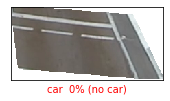

In [29]:
i = 809
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions,  test_labels)

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import load_model

Using TensorFlow backend.


In [6]:
all_images = np.array(images_car + images_no_car)
all_labels = np.array(labels_car + labels_no_car)

In [2]:
class_names = {0:'car', 1:'no car'}


In [3]:
check_data = []
check_label = []
path = r'D:\Efim\thesis\roi\check'
with os.scandir(path) as entries:
        for entry in entries:
            check_data.append(cv2.imread(path + '\\' + entry.name))
            if 'no' in entry.name:
                check_label.append(1)
            else:
                check_label.append(0)
check_data = np.array(check_data)
check_label = np.array(check_label)

In [9]:
model = load_model(r'D:\Efim\thesis\video_model_2.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [11]:
predictions = model.predict(all_images)

In [6]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array[0]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

In [12]:
np.save(r'D:\Efim\thesis\predictions_video_2.npy', predictions)

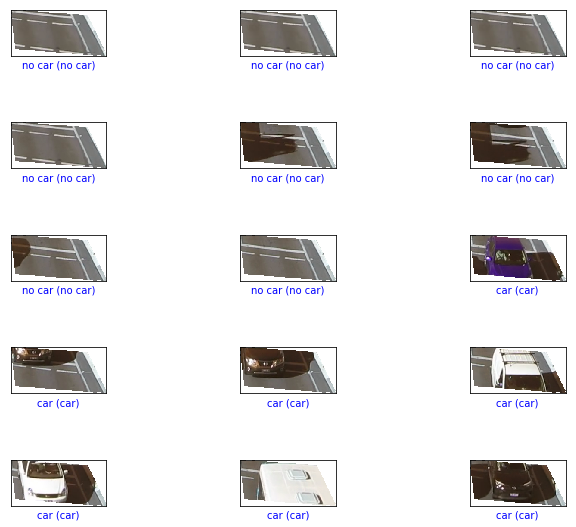

In [7]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, check_label, check_data)

In [2]:
def read_lbl(path,lst_labels):
    with os.scandir(path) as entries:
        for entry in entries:
            if 'no' in path:
                lst_labels.append(1)
            else:
                lst_labels.append(0)

In [3]:
labels_car = []
labels_no_car = []
car_path = r'D:\Efim\thesis\roi\car'
no_car_path = r'D:\Efim\thesis\roi\no_car'

In [4]:
read_lbl(car_path,labels_car)
read_lbl(no_car_path,labels_no_car)

In [14]:
# all_labels = np.array(labels_car + labels_no_car)
pred = np.load(r'D:\Efim\thesis\predictions_video_2.npy')


In [15]:
true_pos = 0
for x in range(0,len(all_labels)):
    if all_labels[x] == round(pred[x][0]):
        true_pos = true_pos+1

In [13]:
for x in range(0,len(all_labels)):
    print(all_labels[x],pred[x][0])

0 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.0
0 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.9999124
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.1563301e-05
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0


0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 6.556511e-07
0 0.0
0 0.029328823
0 0.5540719
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.89514273
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.0
0 1.0
0 1.0
0 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 7.286668e-05
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.9999273
0 0.9932587
0 0.9804437
0 4.2021275e-06
0 0.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.99999994
0 1.0
0 1.0
0 0.0
0 4.887581e-06
0 0.07841745
0 1.0
0 0.0
0 1.0
0 0.0
0 0.9576719
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.03512433
0 1.0
0 0.0
0 1.0
0 0.9535152
0 1.0
0 1.0
0 0.90557086
0 0.9999778
0 1.0
0 1.0
0 0.99995977
0 0.99919724
0 0.99537504
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.000105917454
0 0.9994825
0 0.0
0 0.0
0 0.00030976534
0 0.9945903
0 1.0
0 0.96663386
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.16113922
0 1.0
0 0.9982261
0 0.00048300624
0 0.0
0 2.413988e-06
0 0.000544399
0 0.989535
0 0.9998424
0 1.0
0 1.0
0 1.0
0 0.014588

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 0.9999683
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.99076927
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.9830527
1 1.0
1 1.0
1 0.00056505203
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.99999976
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0

1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.8536352
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 5.9604645e-08
1 0.00027179718
1 0.0
1 0.32666832
1 0.9970877
1 1.0
1 0.0009799898
1 1.0
1 1.0
1 1.0
1 1.0
1 0.99999964
1 1.0
1 1.4007092e-06
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 1.0
1 0.0
1 0.0
1 1.0
1 5.209446e-05
1 4.4822693e-05
1 0.99998707
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.62225235
1 1.0
1 0.0
1 0.96066344
1 0.0
1 0.0
1 0.0
1 5.7160854e-05
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.7881393e-07
1 0.0
1 0.0
1 1.0997057e-05
1 8.940697e-08
1 1.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 3.3795834e-05
1 1.0


1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.74711543
1 0.0
1 0.0
1 0.0
1 1.0
1 0.0
1 0.0024818182
1 0.93261683
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.9999999
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.2341282
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0

1 1.0
1 0.9999989
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.11855763
1 0.99999994
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 2.9802322e-08
1 0.099053115
1 0.99995494
1 0.97270477
1 0.0015046597
1 0.9992075
1 0.99491477
1 0.9949411
1 0.9999887
1 0.9999999
1 0.9999994
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 0.47642848
1 1.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1

1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 1.847744e-06
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1

In [16]:
true_pos

20074